In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/content/Tehran_House_Data.csv')

In [3]:
data.head()

,آپارتمان نوساز,دیروز در تهران، آبشار | فروش آپارتمان,۱۴۷,۱۴۰۰,۳,توافقی,شخصی,آسانسور,پارکینگ,انباری,Unnamed: 10
0,۴۰متر/تک واحدی/پارکینگ/انباری/خوش نقشه,دیروز در تهران، آبشار | فروش آپارتمان,۴۰,۱۳۹۴,۱,توافقی,شخصی,آسانسور ندارد,پارکینگ,انباری,NaN
1,پالادیوم غرب چیتگر/وام۳۰۰میلیونی+دریاچه خلیج فارس,دیروز در تهران، آبشار | فروش آپارتمان,۱۰۰,۱۴۰۰,۲,۴۷۲٫۰۰۰٫۰۰۰ تومان,۴٫۷۲۰٫۰۰۰ تومان,آسانسور,پارکینگ,انباری,NaN
2,آپارتمان مسکونی,دیروز در تهران، آبشار | فروش آپارتمان,۳۵۰,۱۳۹۵,۳,۳۰٫۰۰۰٫۰۰۰٫۰۰۰ تومان,۸۵٫۷۱۴٫۰۰۰ تومان,آسانسور,پارکینگ,انباری ندارد,NaN
3,۶۰ متر ، ۲خواب ، (سماواتی),دیروز در تهران، آبشار | فروش آپارتمان,۶۰,۱۳۹۳,۲,۱٫۴۵۰٫۰۰۰٫۰۰۰ تومان,۲۴٫۱۶۷٫۰۰۰ تومان,آسانسور,پارکینگ ندارد,انباری,NaN
4,۴۴ متر ۱۷ شهریور شمالی / آبشار,دیروز در تهران، آبشار | فروش آپارتمان,۴۳,۱۳۸۲,۱,۸۱۰٫۰۰۰٫۰۰۰ تومان,۱۸٫۸۳۷٫۰۰۰ تومان,آسانسور ندارد,پارکینگ ندارد,انباری,NaN


In [4]:
data = data.drop(columns=['شخصی','Unnamed: 10'])

In [5]:
data.head()

,آپارتمان نوساز,دیروز در تهران، آبشار | فروش آپارتمان,۱۴۷,۱۴۰۰,۳,توافقی,آسانسور,پارکینگ,انباری
0,۴۰متر/تک واحدی/پارکینگ/انباری/خوش نقشه,دیروز در تهران، آبشار | فروش آپارتمان,۴۰,۱۳۹۴,۱,توافقی,آسانسور ندارد,پارکینگ,انباری
1,پالادیوم غرب چیتگر/وام۳۰۰میلیونی+دریاچه خلیج فارس,دیروز در تهران، آبشار | فروش آپارتمان,۱۰۰,۱۴۰۰,۲,۴۷۲٫۰۰۰٫۰۰۰ تومان,آسانسور,پارکینگ,انباری
2,آپارتمان مسکونی,دیروز در تهران، آبشار | فروش آپارتمان,۳۵۰,۱۳۹۵,۳,۳۰٫۰۰۰٫۰۰۰٫۰۰۰ تومان,آسانسور,پارکینگ,انباری ندارد
3,۶۰ متر ، ۲خواب ، (سماواتی),دیروز در تهران، آبشار | فروش آپارتمان,۶۰,۱۳۹۳,۲,۱٫۴۵۰٫۰۰۰٫۰۰۰ تومان,آسانسور,پارکینگ ندارد,انباری
4,۴۴ متر ۱۷ شهریور شمالی / آبشار,دیروز در تهران، آبشار | فروش آپارتمان,۴۳,۱۳۸۲,۱,۸۱۰٫۰۰۰٫۰۰۰ تومان,آسانسور ندارد,پارکینگ ندارد,انباری


In [6]:
np_data = data.to_numpy()

In [7]:
dataset = pd.DataFrame(np_data, columns=['type', 'region', 'area', 'year', 'bedroom', 'price', 'elevator', 'parking', 'storeroom'])

In [8]:
dataset.head()

,type,region,area,year,bedroom,price,elevator,parking,storeroom
0,۴۰متر/تک واحدی/پارکینگ/انباری/خوش نقشه,دیروز در تهران، آبشار | فروش آپارتمان,۴۰,۱۳۹۴,۱,توافقی,آسانسور ندارد,پارکینگ,انباری
1,پالادیوم غرب چیتگر/وام۳۰۰میلیونی+دریاچه خلیج فارس,دیروز در تهران، آبشار | فروش آپارتمان,۱۰۰,۱۴۰۰,۲,۴۷۲٫۰۰۰٫۰۰۰ تومان,آسانسور,پارکینگ,انباری
2,آپارتمان مسکونی,دیروز در تهران، آبشار | فروش آپارتمان,۳۵۰,۱۳۹۵,۳,۳۰٫۰۰۰٫۰۰۰٫۰۰۰ تومان,آسانسور,پارکینگ,انباری ندارد
3,۶۰ متر ، ۲خواب ، (سماواتی),دیروز در تهران، آبشار | فروش آپارتمان,۶۰,۱۳۹۳,۲,۱٫۴۵۰٫۰۰۰٫۰۰۰ تومان,آسانسور,پارکینگ ندارد,انباری
4,۴۴ متر ۱۷ شهریور شمالی / آبشار,دیروز در تهران، آبشار | فروش آپارتمان,۴۳,۱۳۸۲,۱,۸۱۰٫۰۰۰٫۰۰۰ تومان,آسانسور ندارد,پارکینگ ندارد,انباری


In [9]:
dataset = dataset.replace({'elevator': {'آسانسور': True, 'آسانسور ندارد': False}, 
                 'parking': {'پارکینگ': True, 'پارکینگ ندارد': False}, 'storeroom': {'انباری': True, 'انباری ندارد': False}})

In [10]:
dataset = dataset.drop((dataset[dataset['price']=='توافقی']).index)
dataset = dataset.reset_index(drop=True)
dataset.head()

,type,region,area,year,bedroom,price,elevator,parking,storeroom
0,پالادیوم غرب چیتگر/وام۳۰۰میلیونی+دریاچه خلیج فارس,دیروز در تهران، آبشار | فروش آپارتمان,۱۰۰,۱۴۰۰,۲,۴۷۲٫۰۰۰٫۰۰۰ تومان,True,True,True
1,آپارتمان مسکونی,دیروز در تهران، آبشار | فروش آپارتمان,۳۵۰,۱۳۹۵,۳,۳۰٫۰۰۰٫۰۰۰٫۰۰۰ تومان,True,True,False
2,۶۰ متر ، ۲خواب ، (سماواتی),دیروز در تهران، آبشار | فروش آپارتمان,۶۰,۱۳۹۳,۲,۱٫۴۵۰٫۰۰۰٫۰۰۰ تومان,True,False,True
3,۴۴ متر ۱۷ شهریور شمالی / آبشار,دیروز در تهران، آبشار | فروش آپارتمان,۴۳,۱۳۸۲,۱,۸۱۰٫۰۰۰٫۰۰۰ تومان,False,False,True
4,آپارتمان دوخوابه ۸۷.۷۵متر ط۴روی پیلوت ایران محبی,دیروز در تهران، آبشار | فروش آپارتمان,۸۸,۱۳۷۷,۲,۱٫۳۸۰٫۰۰۰٫۰۰۰ تومان,False,True,True


In [11]:
region_v1 = dataset['region'].str.split('|',expand=True)
region_v1.head()

,0,1
0,دیروز در تهران، آبشار,فروش آپارتمان
1,دیروز در تهران، آبشار,فروش آپارتمان
2,دیروز در تهران، آبشار,فروش آپارتمان
3,دیروز در تهران، آبشار,فروش آپارتمان
4,دیروز در تهران، آبشار,فروش آپارتمان


In [12]:
region_v2 = region_v1[0]
region_v2

0          دیروز در تهران، آبشار 
1          دیروز در تهران، آبشار 
2          دیروز در تهران، آبشار 
3          دیروز در تهران، آبشار 
4          دیروز در تهران، آبشار 
                  ...            
1853    دیروز در تهران، مرزداران 
1854    دیروز در تهران، مرزداران 
1855    دیروز در تهران، مرزداران 
1856    دیروز در تهران، مرزداران 
1857    دیروز در تهران، مرزداران 
Name: 0, Length: 1858, dtype: object

In [13]:
region_v3 = region_v2.str.split('،',expand=True)
region_v3.head()

,0,1
0,دیروز در تهران,آبشار
1,دیروز در تهران,آبشار
2,دیروز در تهران,آبشار
3,دیروز در تهران,آبشار
4,دیروز در تهران,آبشار


In [14]:
dataset['region_modify']=region_v3[1]
dataset.head()

,type,region,area,year,bedroom,price,elevator,parking,storeroom,region_modify
0,پالادیوم غرب چیتگر/وام۳۰۰میلیونی+دریاچه خلیج فارس,دیروز در تهران، آبشار | فروش آپارتمان,۱۰۰,۱۴۰۰,۲,۴۷۲٫۰۰۰٫۰۰۰ تومان,True,True,True,آبشار
1,آپارتمان مسکونی,دیروز در تهران، آبشار | فروش آپارتمان,۳۵۰,۱۳۹۵,۳,۳۰٫۰۰۰٫۰۰۰٫۰۰۰ تومان,True,True,False,آبشار
2,۶۰ متر ، ۲خواب ، (سماواتی),دیروز در تهران، آبشار | فروش آپارتمان,۶۰,۱۳۹۳,۲,۱٫۴۵۰٫۰۰۰٫۰۰۰ تومان,True,False,True,آبشار
3,۴۴ متر ۱۷ شهریور شمالی / آبشار,دیروز در تهران، آبشار | فروش آپارتمان,۴۳,۱۳۸۲,۱,۸۱۰٫۰۰۰٫۰۰۰ تومان,False,False,True,آبشار
4,آپارتمان دوخوابه ۸۷.۷۵متر ط۴روی پیلوت ایران محبی,دیروز در تهران، آبشار | فروش آپارتمان,۸۸,۱۳۷۷,۲,۱٫۳۸۰٫۰۰۰٫۰۰۰ تومان,False,True,True,آبشار


In [15]:
price = dataset['price'].str.split(' ',expand=True)
price

,0,1
0,۴۷۲٫۰۰۰٫۰۰۰,تومان
1,۳۰٫۰۰۰٫۰۰۰٫۰۰۰,تومان
2,۱٫۴۵۰٫۰۰۰٫۰۰۰,تومان
3,۸۱۰٫۰۰۰٫۰۰۰,تومان
4,۱٫۳۸۰٫۰۰۰٫۰۰۰,تومان
...,...,...
1853,۵٫۳۰۰٫۰۰۰٫۰۰۰,تومان
1854,۵٫۲۰۰٫۰۰۰٫۰۰۰,تومان
1855,۴٫۴۲۰٫۰۰۰٫۰۰۰,تومان
1856,۹٫۶۰۰٫۰۰۰٫۰۰۰,تومان


In [16]:
dataset['price_modify']=price[0]
dataset.head()

,type,region,area,year,bedroom,price,elevator,parking,storeroom,region_modify,price_modify
0,پالادیوم غرب چیتگر/وام۳۰۰میلیونی+دریاچه خلیج فارس,دیروز در تهران، آبشار | فروش آپارتمان,۱۰۰,۱۴۰۰,۲,۴۷۲٫۰۰۰٫۰۰۰ تومان,True,True,True,آبشار,۴۷۲٫۰۰۰٫۰۰۰
1,آپارتمان مسکونی,دیروز در تهران، آبشار | فروش آپارتمان,۳۵۰,۱۳۹۵,۳,۳۰٫۰۰۰٫۰۰۰٫۰۰۰ تومان,True,True,False,آبشار,۳۰٫۰۰۰٫۰۰۰٫۰۰۰
2,۶۰ متر ، ۲خواب ، (سماواتی),دیروز در تهران، آبشار | فروش آپارتمان,۶۰,۱۳۹۳,۲,۱٫۴۵۰٫۰۰۰٫۰۰۰ تومان,True,False,True,آبشار,۱٫۴۵۰٫۰۰۰٫۰۰۰
3,۴۴ متر ۱۷ شهریور شمالی / آبشار,دیروز در تهران، آبشار | فروش آپارتمان,۴۳,۱۳۸۲,۱,۸۱۰٫۰۰۰٫۰۰۰ تومان,False,False,True,آبشار,۸۱۰٫۰۰۰٫۰۰۰
4,آپارتمان دوخوابه ۸۷.۷۵متر ط۴روی پیلوت ایران محبی,دیروز در تهران، آبشار | فروش آپارتمان,۸۸,۱۳۷۷,۲,۱٫۳۸۰٫۰۰۰٫۰۰۰ تومان,False,True,True,آبشار,۱٫۳۸۰٫۰۰۰٫۰۰۰


In [17]:
dataset['price_modify'] = dataset['price_modify'].str.replace('٫','')
dataset.head()

,type,region,area,year,bedroom,price,elevator,parking,storeroom,region_modify,price_modify
0,پالادیوم غرب چیتگر/وام۳۰۰میلیونی+دریاچه خلیج فارس,دیروز در تهران، آبشار | فروش آپارتمان,۱۰۰,۱۴۰۰,۲,۴۷۲٫۰۰۰٫۰۰۰ تومان,True,True,True,آبشار,۴۷۲۰۰۰۰۰۰
1,آپارتمان مسکونی,دیروز در تهران، آبشار | فروش آپارتمان,۳۵۰,۱۳۹۵,۳,۳۰٫۰۰۰٫۰۰۰٫۰۰۰ تومان,True,True,False,آبشار,۳۰۰۰۰۰۰۰۰۰۰
2,۶۰ متر ، ۲خواب ، (سماواتی),دیروز در تهران، آبشار | فروش آپارتمان,۶۰,۱۳۹۳,۲,۱٫۴۵۰٫۰۰۰٫۰۰۰ تومان,True,False,True,آبشار,۱۴۵۰۰۰۰۰۰۰
3,۴۴ متر ۱۷ شهریور شمالی / آبشار,دیروز در تهران، آبشار | فروش آپارتمان,۴۳,۱۳۸۲,۱,۸۱۰٫۰۰۰٫۰۰۰ تومان,False,False,True,آبشار,۸۱۰۰۰۰۰۰۰
4,آپارتمان دوخوابه ۸۷.۷۵متر ط۴روی پیلوت ایران محبی,دیروز در تهران، آبشار | فروش آپارتمان,۸۸,۱۳۷۷,۲,۱٫۳۸۰٫۰۰۰٫۰۰۰ تومان,False,True,True,آبشار,۱۳۸۰۰۰۰۰۰۰


In [18]:
dataset['year'] = dataset['year'].str.replace('قبل از','')

In [19]:
# dataset['area_modify'] =dataset['area']
dataset['area_modify'] = dataset['area'].astype(str).astype(int)
dataset['year_modify'] = dataset['year'].astype(str).astype(int)
dataset['price_modify'] = dataset['price_modify'].astype(str).astype(int)
dataset['bedroom_modify'] = dataset['bedroom'].astype(str).astype(int)
dataset.head()

,type,region,area,year,bedroom,price,elevator,parking,storeroom,region_modify,price_modify,area_modify,year_modify,bedroom_modify
0,پالادیوم غرب چیتگر/وام۳۰۰میلیونی+دریاچه خلیج فارس,دیروز در تهران، آبشار | فروش آپارتمان,۱۰۰,۱۴۰۰,۲,۴۷۲٫۰۰۰٫۰۰۰ تومان,True,True,True,آبشار,472000000,100,1400,2
1,آپارتمان مسکونی,دیروز در تهران، آبشار | فروش آپارتمان,۳۵۰,۱۳۹۵,۳,۳۰٫۰۰۰٫۰۰۰٫۰۰۰ تومان,True,True,False,آبشار,30000000000,350,1395,3
2,۶۰ متر ، ۲خواب ، (سماواتی),دیروز در تهران، آبشار | فروش آپارتمان,۶۰,۱۳۹۳,۲,۱٫۴۵۰٫۰۰۰٫۰۰۰ تومان,True,False,True,آبشار,1450000000,60,1393,2
3,۴۴ متر ۱۷ شهریور شمالی / آبشار,دیروز در تهران، آبشار | فروش آپارتمان,۴۳,۱۳۸۲,۱,۸۱۰٫۰۰۰٫۰۰۰ تومان,False,False,True,آبشار,810000000,43,1382,1
4,آپارتمان دوخوابه ۸۷.۷۵متر ط۴روی پیلوت ایران محبی,دیروز در تهران، آبشار | فروش آپارتمان,۸۸,۱۳۷۷,۲,۱٫۳۸۰٫۰۰۰٫۰۰۰ تومان,False,True,True,آبشار,1380000000,88,1377,2


In [20]:
temp = dataset.loc[:, ['region_modify', 'area_modify', 'year_modify', 'bedroom_modify', 'elevator', 'parking', 'storeroom', 'price_modify']]
temp

,region_modify,area_modify,year_modify,bedroom_modify,elevator,parking,storeroom,price_modify
0,آبشار,100,1400,2,True,True,True,472000000
1,آبشار,350,1395,3,True,True,False,30000000000
2,آبشار,60,1393,2,True,False,True,1450000000
3,آبشار,43,1382,1,False,False,True,810000000
4,آبشار,88,1377,2,False,True,True,1380000000
...,...,...,...,...,...,...,...,...
1853,مرزداران,112,1392,2,True,True,True,5300000000
1854,مرزداران,95,1395,3,True,True,True,5200000000
1855,مرزداران,93,1386,2,True,True,True,4420000000
1856,مرزداران,160,1400,3,True,True,True,9600000000


In [21]:
np_temp = temp.to_numpy()

In [22]:
data_final = pd.DataFrame(np_temp, columns=['region', 'area', 'year', 'bedroom', 'elevator', 'parking', 'storeroom', 'price'])
data_final

,region,area,year,bedroom,elevator,parking,storeroom,price
0,آبشار,100,1400,2,True,True,True,472000000
1,آبشار,350,1395,3,True,True,False,30000000000
2,آبشار,60,1393,2,True,False,True,1450000000
3,آبشار,43,1382,1,False,False,True,810000000
4,آبشار,88,1377,2,False,True,True,1380000000
...,...,...,...,...,...,...,...,...
1853,مرزداران,112,1392,2,True,True,True,5300000000
1854,مرزداران,95,1395,3,True,True,True,5200000000
1855,مرزداران,93,1386,2,True,True,True,4420000000
1856,مرزداران,160,1400,3,True,True,True,9600000000


In [23]:
data_final.to_csv('/content/Tehran_House_Data_modified.csv')

In [24]:
data_final.describe()

,region,area,year,bedroom,elevator,parking,storeroom,price
count,1858,1858,1858,1858,1858,1858,1858,1858
unique,16,163,31,4,2,2,2,471
top,بریانک,60,1400,2,True,True,True,1000000000
freq,189,78,309,887,1163,1246,1534,48


<function seaborn.utils.despine>

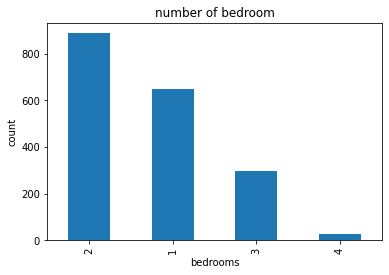

In [25]:
data_final['bedroom'].value_counts().plot(kind='bar')
plt.title('number of bedroom')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine

<function seaborn.utils.despine>

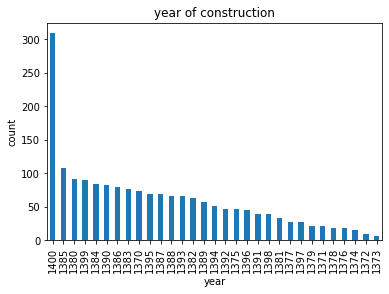

In [26]:
data_final['year'].value_counts().plot(kind='bar')
plt.title('year of construction')
plt.xlabel('year')
plt.ylabel('count')
sns.despine

In [27]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data_final['region_label']= label_encoder.fit_transform(data_final['region']) 
data_final

,region,area,year,bedroom,elevator,parking,storeroom,price,region_label
0,آبشار,100,1400,2,True,True,True,472000000,0
1,آبشار,350,1395,3,True,True,False,30000000000,0
2,آبشار,60,1393,2,True,False,True,1450000000,0
3,آبشار,43,1382,1,False,False,True,810000000,0
4,آبشار,88,1377,2,False,True,True,1380000000,0
...,...,...,...,...,...,...,...,...,...
1853,مرزداران,112,1392,2,True,True,True,5300000000,15
1854,مرزداران,95,1395,3,True,True,True,5200000000,15
1855,مرزداران,93,1386,2,True,True,True,4420000000,15
1856,مرزداران,160,1400,3,True,True,True,9600000000,15


In [28]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        1858 non-null   object
 1   area          1858 non-null   object
 2   year          1858 non-null   object
 3   bedroom       1858 non-null   object
 4   elevator      1858 non-null   object
 5   parking       1858 non-null   object
 6   storeroom     1858 non-null   object
 7   price         1858 non-null   object
 8   region_label  1858 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 130.8+ KB


In [29]:
data_final[['area', 'year', 'bedroom', 'elevator', 'parking', 'price']] = data_final[['area', 'year', 'bedroom', 'elevator', 'parking', 'price']].astype(int)
data_final

,region,area,year,bedroom,elevator,parking,storeroom,price,region_label
0,آبشار,100,1400,2,1,1,True,472000000,0
1,آبشار,350,1395,3,1,1,False,30000000000,0
2,آبشار,60,1393,2,1,0,True,1450000000,0
3,آبشار,43,1382,1,0,0,True,810000000,0
4,آبشار,88,1377,2,0,1,True,1380000000,0
...,...,...,...,...,...,...,...,...,...
1853,مرزداران,112,1392,2,1,1,True,5300000000,15
1854,مرزداران,95,1395,3,1,1,True,5200000000,15
1855,مرزداران,93,1386,2,1,1,True,4420000000,15
1856,مرزداران,160,1400,3,1,1,True,9600000000,15


In [30]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        1858 non-null   object
 1   area          1858 non-null   int64 
 2   year          1858 non-null   int64 
 3   bedroom       1858 non-null   int64 
 4   elevator      1858 non-null   int64 
 5   parking       1858 non-null   int64 
 6   storeroom     1858 non-null   object
 7   price         1858 non-null   int64 
 8   region_label  1858 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 130.8+ KB


In [31]:
from sklearn.model_selection import train_test_split

y = data_final['region_label']
X = data_final.iloc[:,1:7]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators = 100) 
classifier_rf.fit(X_train, y_train)

y_pred = classifier_rf.predict(X_test)


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  2  0  0  0  2  2  1  1  0  0  0  2]
 [ 0  1 16  1  2  0  1  0  1  0  0  1  0  0  0  0]
 [ 1  3  1 14  3  0  0  1  1  3  9  1  4  1  0  2]
 [ 1  0  0  1 19  0  0  0  0  4  2  1  1  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  1  0  0  2  0  0]
 [ 0  0  0  0  0  0  0 16  0  2  0  0  0  0  0  2]
 [ 0  0  0  1  0  0  0  0 11  0  0  0  2  0  0  1]
 [ 0  1  0  3  5  0  0  1  2  9  4  0  1  0  0  0]
 [ 1  2  1 10  0  0  0  0  1  4 15  1  1  0  1  0]
 [ 0  2  0  1  1  1  2  1  0  1  0  7  0  0  0  0]
 [ 0  2  2  6  4  0  0  0  0  3  2  1 11  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  3  2  1  1  0  0  1  0  0  2  0  1  0  1  2]]
Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       0.56    

In [34]:
from sklearn.model_selection import train_test_split

total = data_final.iloc[:,1:]
y = total.pop('price')
X = total

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

print(lin_reg.score(X_test_scaled, y_test))

0.7560475739840182
